## Preprocessing for Machine Learing in Python

### CHAPTER 1. Introduction to Data Preprocessing

#### 1.1 Introduction to preprocessing

* It comes after exploratory data analysis and data cleaning
* It is a process of preparing data for modeling
* Example:
    * transforming categorical features into numerical features (dummy variables)
    * removing missing data

Why preprocess?
* Transform dataset so it's suitable for modeling
* Improve model performance
* Generate more reliable results

Recap: exploring data with pandas
* check data with *.head()*
* check data information with *.info()*
* check summary statistics with *.describe()*


In [105]:
# exploring missing data
import pandas as pd

volunteer = pd.read_csv('8_datasets/volunteer.csv')
print(volunteer.head())
print(volunteer.isna().sum())
print(volunteer.shape)

   opportunity_id  content_id  vol_requests  event_time  \
0            4996       37004            50           0   
1            5008       37036             2           0   
2            5016       37143            20           0   
3            5022       37237           500           0   
4            5055       37425            15           0   

                                               title  hits  \
0  Volunteers Needed For Rise Up & Stay Put! Home...   737   
1                                       Web designer    22   
2      Urban Adventures - Ice Skating at Lasker Rink    62   
3  Fight global hunger and support women farmers ...    14   
4                                      Stop 'N' Swap    31   

                                             summary is_priority  category_id  \
0  Building on successful events last summer and ...         NaN          NaN   
1             Build a website for an Afghan business         NaN          1.0   
2  Please join us and the stu

In [106]:
# dropping missing data
# drop 'Latitude' and 'Longitude' columns
volunteer_cols = volunteer.drop(['Latitude', 'Longitude'], axis=1)

# drop rows with missing 'category_desc' column
volunteer_subset = volunteer_cols.dropna(subset=['category_desc'])

print(volunteer_subset.shape)

(617, 33)


#### 1.2 Working with data types

Common data types:
* 'object': string/mixed types
* 'int64': integer
* 'float64': float
* 'datetime64': dates and times

Converting column types:
* *astype()* method to specify data type

In [107]:
# exploring data types
import pandas as pd
volunteer = pd.read_csv('8_datasets/volunteer.csv')
print(volunteer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   opportunity_id      665 non-null    int64  
 1   content_id          665 non-null    int64  
 2   vol_requests        665 non-null    int64  
 3   event_time          665 non-null    int64  
 4   title               665 non-null    object 
 5   hits                665 non-null    int64  
 6   summary             665 non-null    object 
 7   is_priority         62 non-null     object 
 8   category_id         617 non-null    float64
 9   category_desc       617 non-null    object 
 10  amsl                0 non-null      float64
 11  amsl_unit           0 non-null      float64
 12  org_title           665 non-null    object 
 13  org_content_id      665 non-null    int64  
 14  addresses_count     665 non-null    int64  
 15  locality            595 non-null    object 
 16  region  

In [108]:
# converting a column type -> 'hits'
print(volunteer['hits'].head())
volunteer['hits'] = volunteer['hits'].astype('int64')
print(volunteer['hits'].dtypes)

0    737
1     22
2     62
3     14
4     31
Name: hits, dtype: int64
int64


#### 1.3 Training and test sets

Why split?
* Reduces over-fitting
* Evaluate performance on a holdout set
* *train_test_split()* method to split
* *stratify* parameter to avoid class imbalance


In [109]:
# class imbalance
import pandas as pd
volunteer = pd.read_csv('8_datasets/volunteer.csv')

# check class distribution
print(volunteer['category_desc'].value_counts())


Strengthening Communities    307
Helping Neighbors in Need    119
Education                     92
Health                        52
Environment                   32
Emergency Preparedness        15
Name: category_desc, dtype: int64


In [110]:
# drop missing value columns
volunteer = volunteer.dropna(axis=1, thresh=600)

# check missing values
print(volunteer.isna().sum())

# fill in these missing values in these three columns:
volunteer['category_id'] = volunteer['category_id'].astype('object')
volunteer['category_id'] = volunteer['category_id'].fillna('bfill')

volunteer['category_desc'] = volunteer['category_desc'].astype('object')
volunteer['category_desc'] = volunteer['category_desc'].fillna('bfill')

volunteer['postalcode'] = volunteer['postalcode'].astype('object')
volunteer['postalcode'] = volunteer['postalcode'].fillna('bfill')
# check missing values again
print(volunteer.isna().sum())


opportunity_id         0
content_id             0
vol_requests           0
event_time             0
title                  0
hits                   0
summary                0
category_id           48
category_desc         48
org_title              0
org_content_id         0
addresses_count        0
region                 0
postalcode             6
display_url            0
recurrence_type        0
hours                  0
created_date           0
last_modified_date     0
start_date_date        0
end_date_date          0
status                 0
dtype: int64
opportunity_id        0
content_id            0
vol_requests          0
event_time            0
title                 0
hits                  0
summary               0
category_id           0
category_desc         0
org_title             0
org_content_id        0
addresses_count       0
region                0
postalcode            0
display_url           0
recurrence_type       0
hours                 0
created_date          0
last_

In [111]:
# stratified sampling
from sklearn.model_selection import train_test_split

# split data into X and y
X = volunteer.drop(['category_desc'], axis=1)
y = volunteer[['category_desc']]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print(y_train['category_desc'].value_counts())

# the training set class distribution is the same as original dataset

Strengthening Communities    245
Helping Neighbors in Need     95
Education                     74
Health                        42
bfill                         38
Environment                   26
Emergency Preparedness        12
Name: category_desc, dtype: int64


### CHAPTER 2. Standardizing Data

#### 2.1 Standardization

* It transforms *continuous data* to look *normally distributed*
* 'scikit-learn' models assume normally distributed data
* Using non-normal training data can lead to bias

Two methods of standardization:
1. Log normalization
2. Scaling

When to standardize?
* When working with models that use a linear distance metric or operate in a linear space (e.g: k-nearest neighbors, linear regression, k-means clustering)
* When dataset features have *high variance*
* When dataset features are on *different scales*

In [112]:
# modeling without normalizing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

wine = pd.read_csv('8_datasets/wine.csv')

# split data
X = wine.drop('Type', axis=1)
y = wine['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# fit k-neearest neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))


0.7777777777777778


The result is not very good, let's see how we can improve model performance by standardization.

#### 2.2 Log normalization

* It is useful when features have high variance
* It applies logarithm transformation to the values
* It takes the natural log of each number:
$$ e( \approx 2.718) $$
* It captures relative changes, the magnitude of change, and keeps everything positive
* Use *log()* function from 'numpy' library

In [113]:
# checking the variance
import pandas as pd

wine = pd.read_csv('8_datasets/wine.csv')
print(wine.describe())
# column 'Proline' has extremely high variance

             Type     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

In [114]:
# log normlization in Python
import numpy as np

# print variance of column 'Proline'
print(wine['Proline'].var())

# get log normalization variance
wine['Proline_log'] = np.log(wine['Proline'])
print(wine['Proline_log'].var())


99166.71735542436
0.17231366191842012


#### 2.3 Scaling data for feature comparision

* It is useful when features are on different scales
* Model with linear characteristics
* It centers feature around 0 and transform to variance of 1
* It transforms to approximately normal distribution
* Use *StandardScaler()* method from 'sklearn' library

In [115]:
# scaling data
import pandas as pd

wine = pd.read_csv('8_datasets/wine.csv')
print(wine.info())

# check columns statistics
print(wine.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [116]:
# standardizing columns
from sklearn.preprocessing import StandardScaler

# create scaler
scaler = StandardScaler()

# get subset
cols=['Ash', 'Alcalinity of ash', 'Magnesium']
wine_subset = wine[cols]

# apply scaler
wine_subset_scaled = scaler.fit_transform(wine_subset)

#### 2.4 Standardized data and modeling

Recall:
* k-nearest neighbors is a model classifies data based on its distance on training set data
* New data is assigned a label based on the class that majority of surrounding data points belong to
* It is important to **split the data before preprocessing**, so none of the test data is used to train the model

In [117]:
# KNN on non-scaled data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

wine = pd.read_csv('8_datasets/wine.csv')

# split the dataset
X = wine.drop('Type', axis=1)
y = wine['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# create KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# get score
print('KNN on unscaled data:')
print(knn.score(X_test, y_test))

KNN on unscaled data:
0.7777777777777778


In [118]:
# KNN on scaled data
from sklearn.preprocessing import StandardScaler

# use the same dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# create scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create model
knn.fit(X_train_scaled, y_train)

# get score
print('KNN on scaled data:')
print(knn.score(X_test_scaled, y_test))

KNN on scaled data:
0.9333333333333333


There is a significant improvement on model performance after scaling data!

### CHAPTER 3. Feature Engineering

#### 3.1 Feature Engineering

* It is creation of new features from existing ones
* Advantages:
    1. Add more information to the dataset
    2. Improve model performance
    3. Add more insight into relationships between features
* You need to know your data first!
* It is highly dataset-dependent, each dataset might require different feature engineering

Scenarios of using feature engineering:
1. text data  -> natural language processing (NLP)
2. date and time data -> split time and data


In [119]:
# identify areas for feature engineering
import pandas as pd
volunteer = pd.read_csv('8_datasets/volunteer.csv')
# check the columns you might want to perform a feature engineering task on
# columns include 'created_date', 'title', 'category_desc'
# these columns are text data and date and time data
cols = ['created_date', 'title', 'category_desc']
subset = volunteer[cols]
print(subset.head())


      created_date                                              title  \
0  January 13 2011  Volunteers Needed For Rise Up & Stay Put! Home...   
1  January 14 2011                                       Web designer   
2  January 19 2011      Urban Adventures - Ice Skating at Lasker Rink   
3  January 21 2011  Fight global hunger and support women farmers ...   
4  January 28 2011                                      Stop 'N' Swap   

               category_desc  
0                        NaN  
1  Strengthening Communities  
2  Strengthening Communities  
3  Strengthening Communities  
4                Environment  


#### 3.2 Encoding categorical variables

* In models, categorical variables need to converted to numerical variables
* Encoding scenarios:
1. Encoding binary categorical variables
    (1) 'pandas' method -> use *apply* and write a conditional that returns 1 and 0 respectively
    (2) 'sklearn' method -> *LabelEncoder()* method
2. One-hot Encoding: a list of 0s and 1s to represent multiple values that more than 2
    (1) 'pandas' method -> *get_dummies()* method


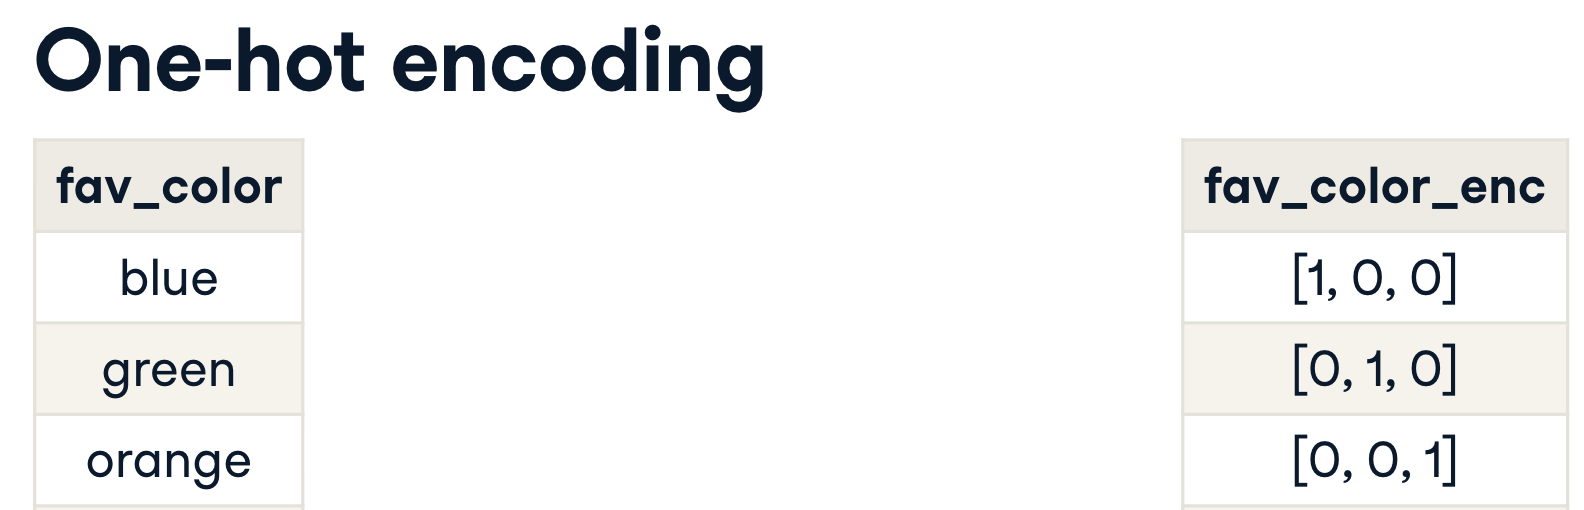

In [120]:
# display image
from IPython import display
display.Image('Images/8_one_hot_encoding.PNG')

In [121]:
# encoding categorical variables - binary
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# get dataset
hiking = pd.read_json('8_datasets/hiking.json')

# encode column 'Accessible'
enc = LabelEncoder()
hiking['Accessible_enc'] = enc.fit_transform(hiking['Accessible'])

# compare two columns
print(hiking[['Accessible', 'Accessible_enc']].head())

  Accessible  Accessible_enc
0          Y               1
1          N               0
2          N               0
3          N               0
4          N               0


In [122]:
# encoding categorical variables - one-hot
# with 'get_dummies' method from 'pandas' library
import pandas as pd

# get dataset
volunteer = pd.read_csv('8_datasets/volunteer.csv')

# encode column 'category_desc'
category_enc = pd.get_dummies(volunteer['category_desc'])
print(category_enc.head())


   Education  Emergency Preparedness  Environment  Health  \
0          0                       0            0       0   
1          0                       0            0       0   
2          0                       0            0       0   
3          0                       0            0       0   
4          0                       0            1       0   

   Helping Neighbors in Need  Strengthening Communities  
0                          0                          0  
1                          0                          1  
2                          0                          1  
3                          0                          1  
4                          0                          0  


#### 3.3 Engineering numerical features

* Even numerical features need feature engineering sometimes
* It will add more value to model's performance

* Scenarios of numerical engineering:
1. Aggregate statistics -> e.g: mean, median
2. Dates -> e.g: extract year, month ,day

In [123]:
# aggregating numerical columns
import pandas as pd

# making data by hand
name = ['Sue', 'Mark', 'Sean', 'Erin', 'Jenny', 'Russell']
run1 = [20.1, 16.5, 23.5, 21.7, 25.8, 30.9]
run2 = [18.5, 17.1, 25.1, 21.1, 27.1, 29.6]
run3 = [19.6, 16.9, 25.2, 20.9, 26.1, 31.4]
run4 = [20.3, 17.6, 24.6, 22.1, 26.7, 30.4]
run5 = [18.3, 17.3, 23.9, 22.2, 26.9, 29.9]

running_times_5k = pd.DataFrame({'name':name, 'run1':run1, 'run2':run2, 'run3':run3, 'run4':run4, 'run5':run5})

# create average column
run_columns = ['run1', 'run2','run3', 'run4', 'run5']
running_times_5k['mean'] = running_times_5k.apply(lambda row:row[run_columns].mean(), axis=1)
print(running_times_5k.head())

    name  run1  run2  run3  run4  run5   mean
0    Sue  20.1  18.5  19.6  20.3  18.3  19.36
1   Mark  16.5  17.1  16.9  17.6  17.3  17.08
2   Sean  23.5  25.1  25.2  24.6  23.9  24.46
3   Erin  21.7  21.1  20.9  22.1  22.2  21.60
4  Jenny  25.8  27.1  26.1  26.7  26.9  26.52


In [124]:
# extracting datetime components
import pandas as pd

# get dataset
volunteer = pd.read_csv('8_datasets/volunteer.csv')

# extract month from column 'start_date'
volunteer['start_date_converted'] = pd.to_datetime(volunteer['start_date_date'])
volunteer['start_date_month'] = volunteer['start_date_converted'].dt.month
print(volunteer[['start_date_converted', 'start_date_month']].head())

  start_date_converted  start_date_month
0           2011-07-30                 7
1           2011-02-01                 2
2           2011-01-29                 1
3           2011-02-14                 2
4           2011-02-05                 2


#### 3.4 Engineering text features

Text engineering methods:
1. Extraction part of the information with **regular expressions** from 're' library
2. Vectorizing text and transfer it into a numerical input **IF/IDF** (TF = Term Frequency; IDF = Inverse Document Frequency), and vectorized data can be used for **text classification**, which is based on *Bayes theorem of conditional probability*


In [125]:
# extracting string patterns
import pandas as pd
import re

# get dataset
hiking = pd.read_json('8_datasets/hiking.json')

# write a pattern to extract numbers and decimals
def return_mileage(length):
    pattern = re.compile(r"\d+\.\d+")
    mile = re.match(pattern, str(length))

    if mile is not None:
        return float(mile.group(0))

# apply the function to the Length column
hiking['Length_num'] = hiking['Length'].apply(lambda row: return_mileage(row))
print(hiking[['Length', 'Length_num']].head())

       Length  Length_num
0   0.8 miles        0.80
1    1.0 mile        1.00
2  0.75 miles        0.75
3   0.5 miles        0.50
4   0.5 miles        0.50


In [126]:
# vectoring text
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# get dataset
volunteer = pd.read_csv('8_datasets/volunteer.csv')

# take the text
title_text = volunteer['title']

# create tf-idf vectors
tfidf_vec = TfidfVectorizer()
text_tfidf = tfidf_vec.fit_transform(title_text)


In [127]:
# drop missing value columns
volunteer = volunteer.dropna(axis=1, thresh=600)

# check missing values
print(volunteer.isna().sum())

# fill in these missing values in these three columns:
volunteer['category_id'] = volunteer['category_id'].astype('object')
volunteer['category_id'] = volunteer['category_id'].fillna('bfill')

volunteer['category_desc'] = volunteer['category_desc'].astype('object')
volunteer['category_desc'] = volunteer['category_desc'].fillna('bfill')

volunteer['postalcode'] = volunteer['postalcode'].astype('object')
volunteer['postalcode'] = volunteer['postalcode'].fillna('bfill')

# check missing values again
print(volunteer.isna().sum())

opportunity_id         0
content_id             0
vol_requests           0
event_time             0
title                  0
hits                   0
summary                0
category_id           48
category_desc         48
org_title              0
org_content_id         0
addresses_count        0
region                 0
postalcode             6
display_url            0
recurrence_type        0
hours                  0
created_date           0
last_modified_date     0
start_date_date        0
end_date_date          0
status                 0
dtype: int64
opportunity_id        0
content_id            0
vol_requests          0
event_time            0
title                 0
hits                  0
summary               0
category_id           0
category_desc         0
org_title             0
org_content_id        0
addresses_count       0
region                0
postalcode            0
display_url           0
recurrence_type       0
hours                 0
created_date          0
last_

In [128]:
# text classification using tf/idf vectors
# use the same dataset as above exercise
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# split dataset
y = volunteer['category_desc']
X_train, X_test, y_train, y_test = train_test_split(text_tfidf.toarray(), y, stratify=y, random_state=42)

# create and fit the model
nb = GaussianNB()
nb.fit(X_train, y_train)
print(nb.score(X_test, y_test))

0.4311377245508982


### CHAPTER 4. Selecting Features for Modeling

#### 4.1 Feature Selection

* It is a method of selecting features to be used for modeling
* It does NOT create new features
* It improves model's performance

When to select features?
1. Reducing noise
2. Features are strongly statistically correlated
3. Reduce overall variance

In [129]:
# identifying areas for feature selection
import pandas as pd

# get dataset
hiking = pd.read_json('8_datasets/hiking.json')
print(hiking.head())

# check possible columns that can be removed after feature selection and feature engineering

  Prop_ID                     Name  \
0    B057  Salt Marsh Nature Trail   
1    B073                Lullwater   
2    B073                  Midwood   
3    B073                Peninsula   
4    B073                Waterfall   

                                            Location      Park_Name  \
0  Enter behind the Salt Marsh Nature Center, loc...    Marine Park   
1  Enter Park at Lincoln Road and Ocean Avenue en...  Prospect Park   
2  Enter Park at Lincoln Road and Ocean Avenue en...  Prospect Park   
3  Enter Park at Lincoln Road and Ocean Avenue en...  Prospect Park   
4  Enter Park at Lincoln Road and Ocean Avenue en...  Prospect Park   

       Length Difficulty                                      Other_Details  \
0   0.8 miles       None  <p>The first half of this mile-long trail foll...   
1    1.0 mile       Easy  Explore the Lullwater to see how nature thrive...   
2  0.75 miles       Easy  Step back in time with a walk through Brooklyn...   
3   0.5 miles       Easy  Di

#### 4.2 Removing redundant features

* Remove noisy features
* Remove correlated features
* Remove duplicated features


In [130]:
# selecting relevant features
import pandas as pd

# get dataset
volunteer = pd.read_csv('8_datasets/volunteer.csv')

# create redundant columns to drop
to_drop = ['locality', 'region', 'category_desc', 'vol_requests', 'created_date']
volunteer_subset = volunteer.drop(to_drop, axis=1)
print(volunteer_subset.head())

   opportunity_id  content_id  event_time  \
0            4996       37004           0   
1            5008       37036           0   
2            5016       37143           0   
3            5022       37237           0   
4            5055       37425           0   

                                               title  hits  \
0  Volunteers Needed For Rise Up & Stay Put! Home...   737   
1                                       Web designer    22   
2      Urban Adventures - Ice Skating at Lasker Rink    62   
3  Fight global hunger and support women farmers ...    14   
4                                      Stop 'N' Swap    31   

                                             summary is_priority  category_id  \
0  Building on successful events last summer and ...         NaN          NaN   
1             Build a website for an Afghan business         NaN          1.0   
2  Please join us and the students from Mott Hall...         NaN          1.0   
3  The Oxfam Action Corps is a g

In [131]:
# checking for correlated features
import pandas as pd

wine = pd.read_csv('8_datasets/wine.csv')

# get correlation matrix
print(wine.corr())

# pick the column to drop
to_drop = "Flavanoids"
wine = wine.drop(to_drop, axis=1)


                                  Type   Alcohol  Malic acid       Ash  \
Type                          1.000000 -0.328222    0.437776 -0.049643   
Alcohol                      -0.328222  1.000000    0.094397  0.211545   
Malic acid                    0.437776  0.094397    1.000000  0.164045   
Ash                          -0.049643  0.211545    0.164045  1.000000   
Alcalinity of ash             0.517859 -0.310235    0.288500  0.443367   
Magnesium                    -0.209179  0.270798   -0.054575  0.286587   
Total phenols                -0.719163  0.289101   -0.335167  0.128980   
Flavanoids                   -0.847498  0.236815   -0.411007  0.115077   
Nonflavanoid phenols          0.489109 -0.155929    0.292977  0.186230   
Proanthocyanins              -0.499130  0.136698   -0.220746  0.009652   
Color intensity               0.265668  0.546364    0.248985  0.258887   
Hue                          -0.617369 -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines -0.788230

#### 4.3 Selecting features using text vectors

* We DO NOT need the entire TF-IDF vector to train a model
* We need iteration to test different subsets of the TF-IDF vector to see what works
* We need to check the word **vocabulary** and **weights** in the vectorizer in 'sklearn' library

In [132]:
# exploring text vectors (PART I)
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# get dataset
volunteer = pd.read_csv('8_datasets/volunteer.csv')

# get tf/idf vector from 'title' column
tfidf_vec = TfidfVectorizer()
text_tfidf = tfidf_vec.fit_transform(volunteer['title'])

# vocab = {v:k for k,v in tfidf_vec.vocabulary_.items()}
# zipped_row = dict(zip(text_tfidf[3].indices, text_tfidf[3].data))

In [133]:
# create pre-defined vocab
vocab = {1048: 'web', 278: 'designer', 1017: 'urban', 38: 'adventures', 490: 'ice', 890: 'skating', 90: 'at', 559: 'lasker', 832: 'rink', 368: 'fight', 423: 'global', 487: 'hunger', 68: 'and', 944: 'support', 1061: 'women', 356: 'farmers', 535: 'join', 969: 'the', 708: 'oxfam', 27: 'action', 240: 'corps', 498: 'in', 680: 'nyc', 922: 'stop', 947: 'swap', 790: 'queens', 911: 'staff', 281: 'development', 992: 'trainer', 200: 'claro', 145: 'brooklyn', 1037: 'volunteer', 93: 'attorney', 221: 'community', 455: 'health', 43: 'advocates', 942: 'supervise', 189: 'children', 466: 'highland', 717: 'park', 409: 'garden', 1071: 'worldofmoney', 696: 'org', 1085: 'youth', 60: 'amazing', 791: 'race', 789: 'qualified', 133: 'board', 620: 'member', 860: 'seats', 98: 'available', 1083: 'young', 33: 'adult', 1006: 'tutor', 1016: 'updated', 11: '30', 0: '11', 513: 'insurance', 199: 'claims', 600: 'manager', 979: 'timebanksnyc', 432: 'great', 340: 'exchange', 205: 'clean', 1015: 'up', 81: 'asbury', 171: 'cementary', 918: 'staten', 524: 'island', 869: 'senior', 194: 'citizen', 392: 'friendly', 1033: 'visitor', 881: 'shop', 1000: 'tree', 161: 'care', 1068: 'workshop', 4: '20', 646: 'movie', 856: 'screener', 380: 'for', 870: 'seniors', 355: 'farm', 430: 'graphic', 691: 'open', 480: 'house', 416: 'get', 984: 'tools', 980: 'to', 806: 'recycling', 1039: 'volunteers', 660: 'needed', 353: 'family', 336: 'event', 207: 'clerical', 158: 'cancer', 1041: 'walk', 120: 'befitnyc', 739: 'physical', 30: 'activity', 700: 'organizers', 269: 'decision', 266: 'day', 5: '2011', 661: 'needs', 1084: 'your', 459: 'help', 405: 'gain', 1021: 'valuable', 245: 'counseling', 344: 'experience', 687: 'on', 845: 'samaritans', 9: '24', 479: 'hour', 255: 'crisis', 478: 'hotline', 457: 'heart', 407: 'gallery', 703: 'our', 503: 'info', 949: 'table', 373: 'finding', 471: 'homes', 542: 'kids', 1077: 'yiddish', 903: 'speaking', 472: 'homework', 460: 'helper', 892: 'skilled', 800: 'rebuilding', 982: 'together', 468: 'home', 818: 'repairs', 438: 'greenteam', 40: 'advetures', 940: 'summer', 931: 'streets', 1005: 'tuesday', 335: 'evenings', 1060: 'with', 612: 'masa', 594: 'lunch', 770: 'program', 1018: 'us', 706: 'outreach', 618: 'meals', 760: 'preparedness', 222: 'compost', 773: 'project', 613: 'master', 223: 'composter', 178: 'certificate', 249: 'course', 318: 'emblemhealth', 144: 'bronx', 683: 'of', 873: 'service', 531: 'jcc', 601: 'manhattan', 418: 'girl', 855: 'scout', 872: 'series', 296: 'dorot', 838: 'rosh', 452: 'hashanah', 709: 'package', 274: 'delivery', 713: 'painting', 511: 'instructor', 530: 'jasa', 464: 'hes', 172: 'center', 12: '3rd', 70: 'annual', 377: 'flyny', 548: 'kite', 366: 'festival', 983: 'tomorrow', 151: 'business', 566: 'leaders', 955: 'teach', 110: 'basics', 465: 'high', 852: 'schoolers', 410: 'gardening', 397: 'ft', 1004: 'tryon', 910: 'st', 610: 'martin', 748: 'poetry', 668: 'new', 1079: 'york', 216: 'college', 424: 'goal', 941: 'sunday', 361: 'february', 6: '2012', 262: 'dance', 8: '22nd', 560: 'latino', 604: 'march', 2: '17', 1013: 'university', 848: 'saturday', 1008: 'tutors', 744: 'planet', 485: 'human', 602: 'mapping', 420: 'give', 1050: 'week', 186: 'child', 569: 'learn', 796: 'read', 926: 'storytelling', 243: 'costume', 597: 'making', 912: 'stage', 277: 'design', 319: 'emergency', 351: 'fair', 17: '9th', 1053: 'west', 887: 'side', 248: 'county', 676: 'nutrition', 314: 'educator', 879: 'shape', 306: 'east', 13: '54st', 801: 'rec', 1046: 'water', 45: 'aerobics', 83: 'asser', 573: 'levy', 712: 'paint', 57: 'alongside', 783: 'publicolor', 936: 'students', 536: 'jumpstart', 797: 'readers', 564: 'lead', 252: 'crafts', 408: 'games', 348: 'face', 751: 'popcorn', 527: 'jackie', 835: 'robinson', 716: 'parent', 375: 'fitness', 916: 'starrett', 197: 'city', 585: 'line', 263: 'dancer', 615: 'math', 587: 'literacy', 114: 'be', 209: 'climb', 985: 'top', 608: 'marketing', 86: 'assistant', 313: 'education', 673: 'nonprofit', 867: 'seeks', 805: 'recruitment', 626: 'mentors', 810: 'register', 92: 'attend', 142: 'breakfast', 701: 'orientation', 529: 'january', 272: 'deliver', 1058: 'winter', 1031: 'visit', 65: 'an', 525: 'isolated', 342: 'exercise', 213: 'coach', 670: 'night', 115: 'beach', 180: 'change', 77: 'art', 772: 'programs', 229: 'consumer', 779: 'protection', 562: 'law', 589: 'liver', 579: 'life', 565: 'leader', 901: 'soup', 547: 'kitchen', 307: 'eastern', 534: 'john', 650: 'muir', 930: 'street', 1024: 'vendor', 641: 'monthly', 959: 'team', 367: 'fiesta', 977: 'throgs', 658: 'neck', 224: 'computer', 956: 'teacher', 567: 'leadership', 244: 'council', 693: 'opportunity', 231: 'conversation', 461: 'helpers', 427: 'grades', 714: 'pantry', 288: 'distribution', 305: 'earth', 960: 'tech', 1049: 'website', 692: 'opportunities', 175: 'cents', 19: 'ability', 203: 'classroom', 877: 'set', 146: 'brush', 545: 'kindness', 999: 'transportation', 58: 'alternatives', 129: 'bike', 1020: 'valet', 1026: 'video', 311: 'editing', 767: 'professionals', 921: 'stipend', 49: 'after', 851: 'school', 624: 'mentor', 666: 'networking', 138: 'bowling', 398: 'fun', 449: 'harlem', 555: 'lanes', 866: 'seeking', 1078: 'yoga', 902: 'spanish', 695: 'or', 389: 'french', 362: 'feed', 488: 'hungry', 1080: 'yorkers', 14: '55', 690: 'only', 735: 'phone', 106: 'bank', 819: 'representative', 795: 'reach', 704: 'out', 643: 'morris', 458: 'heights', 904: 'special', 155: 'camp', 946: 'susan', 551: 'komen', 259: 'cure', 433: 'greater', 47: 'affiliate', 303: 'dumbo', 79: 'arts', 698: 'organizational', 148: 'budget', 639: 'money', 596: 'makes', 871: 'sense', 994: 'training', 889: 'site', 1027: 'videographer', 376: 'fly', 152: 'by', 970: 'theater', 429: 'grant', 1074: 'writer', 745: 'planning', 778: 'proposal', 759: 'preparation', 399: 'fund', 793: 'raising', 450: 'harm', 808: 'reduction', 35: 'adv', 515: 'intern', 875: 'serving', 575: 'lgbt', 34: 'adults', 482: 'how', 830: 'ride', 130: 'bikes', 821: 'research', 401: 'fundraising', 280: 'developement', 233: 'cook', 840: 'row', 50: 'afterschool', 630: 'middle', 885: 'shower', 400: 'fundraisers', 526: 'it', 519: 'interpreters', 563: 'lawyers', 446: 'haitian', 18: 'abe', 757: 'pre', 412: 'ged', 640: 'monitor', 89: 'astoria', 634: 'million', 1001: 'trees', 421: 'giveaway', 290: 'do', 1081: 'you', 1044: 'want', 595: 'make', 283: 'difference', 204: 'classwish', 896: 'snow', 883: 'shoveling', 196: 'citizenship', 761: 'press', 586: 'list', 781: 'public', 813: 'relations', 743: 'plan', 829: 'review', 394: 'friendship', 753: 'positive', 121: 'beginnings', 546: 'kit', 611: 'mary', 803: 'recreation', 291: 'does', 697: 'organization', 659: 'need', 858: 'search', 928: 'strategy', 332: 'esl', 46: 'affected', 924: 'storm', 995: 'transform', 590: 'lives', 933: 'strengthen', 220: 'communities', 119: 'become', 302: 'driver', 1025: 'veterans', 191: 'chinese', 997: 'translator', 512: 'instructors', 653: 'museum', 621: 'membership', 275: 'department', 284: 'director', 117: 'beautify', 996: 'transitional', 822: 'residence', 470: 'homeless', 623: 'men', 953: 'tank', 517: 'internship', 774: 'projects', 841: 'run', 1056: 'wild', 139: 'boys', 475: 'hope', 419: 'girls', 219: 'communications', 792: 'raise', 100: 'awareness', 31: 'administrative', 56: 'alliance', 811: 'registrar', 647: 'ms', 1062: 'word', 162: 'career', 246: 'counselor', 722: 'passover', 304: 'early', 188: 'childhood', 149: 'build', 747: 'plastic', 137: 'bottle', 857: 'sculpture', 763: 'pride', 523: 'is', 538: 'just', 76: 'around', 238: 'corner', 520: 'involved', 675: 'now', 390: 'fresh', 53: 'air', 957: 'teachers', 372: 'find', 729: 'perfect', 533: 'job', 684: 'office', 1075: 'writing', 264: 'data', 326: 'entry', 29: 'activism', 738: 'photography', 843: 'salesforce', 265: 'database', 261: 'customization', 736: 'photo', 333: 'essay', 572: 'legal', 42: 'advisor', 467: 'hike', 974: 'thon', 236: 'coordinator', 558: 'laser', 950: 'tag', 298: 'dowling', 3: '175th', 505: 'information', 962: 'technology', 352: 'fall', 382: 'forest', 826: 'restoration', 541: 'kickoff', 1002: 'trevor', 582: 'lifeline', 247: 'counselors', 973: 'thomas', 532: 'jefferson', 614: 'materials', 1076: 'year', 386: 'founder', 341: 'executive', 453: 'haunted', 557: 'lantern', 989: 'tours', 383: 'fort', 986: 'totten', 657: 'national', 878: 'sexual', 82: 'assault', 689: 'online', 993: 'trainers', 48: 'african', 63: 'american', 210: 'clothing', 301: 'drive', 828: 'returning', 865: 'seeds', 939: 'success', 746: 'plant', 981: 'today', 443: 'growth', 1009: 'udec', 328: 'enviromedia', 636: 'mobile', 606: 'maritime', 102: 'bacchanal', 742: 'pirates', 365: 'fest', 492: 'ikea', 329: 'erie', 111: 'basin', 282: 'diabetes', 88: 'association', 364: 'feria', 267: 'de', 844: 'salud', 664: 'nepali', 105: 'bangla', 784: 'punjabi', 998: 'translators', 674: 'not', 769: 'profit', 741: 'pioneer', 159: 'capoeira', 1023: 'various', 752: 'positions', 287: 'dispatcher', 991: 'trainee', 506: 'ing', 603: 'marathon', 388: 'free', 593: 'love', 135: 'books', 268: 'dear', 96: 'authors', 52: 'aide', 850: 'scheuer', 627: 'merchandise', 293: 'donate', 943: 'supplies', 360: 'feast', 406: 'gala', 112: 'battery', 833: 'rise', 919: 'stay', 787: 'put', 820: 'rescue', 897: 'soccer', 402: 'futsal', 730: 'performing', 36: 'advanced', 202: 'classes', 1070: 'world', 854: 'science', 1054: 'western', 64: 'americorps', 25: 'aces', 310: 'economic', 864: 'security', 507: 'initiative', 331: 'esi', 633: 'mill', 173: 'centers', 631: 'midtown', 1088: 'zumba', 1030: 'vision', 635: 'mission', 66: 'analysis', 552: 'lab', 958: 'teaching', 84: 'assist', 827: 'resume', 150: 'building', 899: 'society', 214: 'coaches', 1040: 'vs', 218: 'committee', 842: 'russian', 385: 'foster', 170: 'celebration', 616: 'may', 7: '21th', 688: 'one', 711: 'pager', 294: 'donation', 489: 'hurricane', 521: 'irene', 354: 'far', 836: 'rockaway', 325: 'enjoy', 1066: 'working', 686: 'olympics', 988: 'tournament', 798: 'reading', 719: 'partners', 234: 'cooper', 909: 'square', 975: 'thrift', 908: 'spring', 166: 'case', 599: 'management', 404: 'fvcp', 990: 'trail', 254: 'crew', 447: 'halloween', 165: 'carnival', 1042: 'walkathon', 359: 'feasibility', 67: 'analyst', 749: 'police', 868: 'seminar', 1064: 'work', 1035: 'visually', 496: 'impaired', 964: 'teens', 972: 'this', 322: 'energy', 315: 'efficiency', 321: 'end', 859: 'season', 156: 'campaign', 123: 'benefits', 802: 'reception', 300: 'drill', 237: 'copywriting', 235: 'coord', 454: 'have', 725: 'penchant', 55: 'all', 971: 'things', 1028: 'vintage', 976: 'thriftshop', 718: 'partner', 726: 'pencil', 720: 'partnership', 710: 'packing', 16: '8th', 907: 'sports', 346: 'expo', 164: 'cares', 184: 'cheerleaders', 1045: 'wanted', 445: 'habitat', 371: 'finance', 215: 'coffee', 324: 'english', 755: 'practice', 570: 'learners', 456: 'healthy', 28: 'active', 978: 'time', 122: 'benefit', 73: 'april', 357: 'fashion', 929: 'strawberry', 87: 'assistants', 174: 'central', 1087: 'zoo', 1: '125th', 127: 'bideawee', 440: 'greeters', 592: 'looking', 799: 'real', 495: 'impact', 504: 'inform', 728: 'people', 756: 'practices', 580: 'lifebeat', 413: 'general', 932: 'streetsquash', 286: 'discovery', 874: 'services', 663: 'neighborhood', 768: 'profiles', 951: 'take', 915: 'stand', 51: 'against', 1029: 'violence', 345: 'expert', 41: 'advice', 537: 'june', 849: 'schedule', 258: 'crowdfunding', 727: 'penny', 451: 'harvest', 434: 'green', 185: 'chefs', 677: 'nutritionists', 379: 'foodies', 625: 'mentoring', 136: 'boom', 669: 'newsletter', 217: 'come', 934: 'strides', 1043: 'walks', 187: 'childcare', 898: 'social', 619: 'media', 422: 'giving', 157: 'can', 61: 'ambassador', 10: '2nd', 967: 'thanksgiving', 363: 'feeding', 662: 'needy', 782: 'publicity', 723: 'patient', 163: 'caregiver', 1032: 'visiting', 469: 'homebound', 358: 'fc', 679: 'nyawc', 384: 'forum', 21: 'about', 1038: 'volunteering', 809: 'refreshments', 847: 'sara', 837: 'roosevelt', 206: 'cleanup', 116: 'beautification', 337: 'events', 69: 'animal', 484: 'hudson', 834: 'river', 605: 'mariners', 825: 'response', 343: 'exhibit', 20: 'aboard', 584: 'lilac', 208: 'client', 1052: 'welcome', 279: 'desk', 685: 'older', 574: 'lexington', 251: 'craft', 750: 'poll', 1065: 'workers', 518: 'interperters', 24: 'accounting', 85: 'assistance', 477: 'hosting', 776: 'promotion', 1011: 'unicef', 954: 'tap', 814: 'release', 270: 'dedication', 771: 'programming', 500: 'incarnation', 295: 'donor', 544: 'kieran', 906: 'sponsorship', 1069: 'workshops', 118: 'because', 338: 'every', 276: 'deserves', 179: 'chance', 740: 'pin', 273: 'delivered', 886: 'shred', 15: '5th', 99: 'avenue', 169: 'cdsc', 917: 'starving', 78: 'artist', 884: 'show', 948: 'system', 396: 'front', 880: 'share', 553: 'lanch', 935: 'student', 463: 'hemophilia', 577: 'liason', 629: 'methodist', 476: 'hospital', 113: 'bay', 831: 'ridge', 124: 'benonhurst', 75: 'area', 900: 'sought', 97: 'autistic', 297: 'douglaston', 788: 'qns', 812: 'registration', 32: 'administrator', 153: 'call', 426: 'governor', 804: 'recruiter', 786: 'purim', 327: 'envelope', 938: 'stuffing', 528: 'jam', 462: 'helpline', 923: 'store', 374: 'first', 415: 'generation', 1022: 'van', 241: 'cortlandt', 816: 'remembrance', 945: 'survey', 823: 'resonations', 143: 'breast', 323: 'engine', 694: 'optimization', 622: 'memorial', 894: 'sloan', 540: 'kettering', 435: 'greenhouse', 436: 'greening', 227: 'concert', 334: 'evacuation', 824: 'resources', 417: 'gift', 126: 'bicycling', 656: 'my', 393: 'friends', 473: 'honor', 1051: 'weekend', 731: 'person', 651: 'mural', 312: 'editor', 732: 'personal', 882: 'shopper', 764: 'pro', 134: 'bono', 253: 'create', 160: 'cards', 920: 'step', 672: 'non', 780: 'provider', 516: 'interns', 645: 'motion', 431: 'graphics', 125: 'best', 147: 'buddies', 502: 'inern', 103: 'back', 588: 'little', 242: 'cosmetologist', 107: 'barber', 1036: 'vocational', 72: 'apartment', 439: 'greeter', 766: 'professional', 1019: 'use', 893: 'skills', 702: 'others', 369: 'figure', 257: 'croton', 190: 'chinatown', 193: 'ci', 758: 'prep', 239: 'corporate', 1063: 'wordpress', 132: 'blog', 510: 'instructer', 807: 'red', 474: 'hook', 289: 'divert', 966: 'textiles', 395: 'from', 554: 'landfill', 437: 'greenmarket', 965: 'textile', 154: 'calling', 195: 'citizens', 497: 'improve', 26: 'achievement', 721: 'passion', 481: 'housing', 1067: 'works', 499: 'inc', 441: 'group', 299: 'drama', 561: 'laundromats', 320: 'employment', 927: 'strategic', 667: 'never', 104: 'bad', 391: 'friend', 403: 'future', 201: 'class', 1059: 'wish', 387: 'fpcj', 1072: 'worship', 1010: 'undergraduate', 428: 'graduate', 228: 'conference', 1047: 'we', 775: 'promote', 550: 'knowledge', 715: 'parade', 74: 'archivist', 425: 'google', 44: 'adwords', 493: 'imentor', 642: 'more', 598: 'male', 632: 'miles', 637: 'moms', 183: 'charity', 176: 'century', 987: 'tour', 198: 'civil', 724: 'patrol', 62: 'america', 539: 'kept', 862: 'secret', 648: 'ms131', 549: 'knitter', 256: 'crochet', 131: 'blankets', 177: 'ceo', 591: 'logo', 1012: 'unique', 1057: 'will', 128: 'big', 37: 'adventure', 23: 'accountant', 876: 'session', 888: 'single', 644: 'mothers', 192: 'choice', 895: 'smc', 1055: 'wii', 705: 'outdoor', 671: 'nights', 607: 'market', 514: 'intake', 638: 'monday', 141: 'branding', 140: 'brand', 491: 'identity', 649: 'mt', 1086: 'zion', 543: 'kidz', 817: 'reorganize', 578: 'library', 378: 'food', 91: 'athletic', 568: 'league', 655: 'musician', 59: 'alzheimer', 654: 'music', 109: 'bash', 765: 'proctor', 952: 'taking', 339: 'exams', 777: 'promotional', 733: 'personnel', 95: 'august', 891: 'skill', 665: 'networker', 309: 'ecological', 785: 'puppet', 501: 'income', 414: 'generating', 699: 'organizations', 250: 'cpr', 576: 'lgbtq', 317: 'el', 652: 'museo', 271: 'del', 108: 'barrio', 628: 'met', 330: 'escort', 846: 'sand', 167: 'castle', 230: 'contest', 853: 'schools', 486: 'humanities', 80: 'as', 861: 'second', 556: 'language', 101: 'babies', 963: 'teen', 54: 'al', 682: 'oerter', 483: 'html', 260: 'curriculum', 737: 'photographer', 863: 'secretary', 754: 'pr', 1073: 'would', 583: 'like', 225: 'computers', 961: 'technical', 442: 'grownyc', 968: 'that', 347: 'extraordinary', 381: 'foreclosure', 762: 'prevention', 681: 'nylag', 678: 'ny', 226: 'concern', 509: 'inspire', 22: 'academic', 1007: 'tutoring', 794: 'rbi', 71: 'anyone', 211: 'cma', 212: 'cms', 232: 'conversion', 308: 'eating', 571: 'learning', 181: 'chaperones', 1034: 'visits', 411: 'gear', 1014: 'unlimited', 581: 'lifeguard', 350: 'facilitators', 1003: 'troop', 839: 'route', 609: 'marshall', 508: 'inmotion', 925: 'story', 913: 'stair', 292: 'domestic', 168: 'catskills', 815: 'relief', 316: 'effort', 94: 'audience', 734: 'pharmacy', 444: 'guide', 707: 'overnight', 494: 'immediate', 285: 'dirty', 448: 'hands', 349: 'facilitator', 905: 'specialist', 182: 'chapter', 914: 'stamps', 522: 'iridescent', 937: 'studio', 39: 'advertising', 370: 'filmmakers', 617: 'mayor', 1082: 'youcantoo'}


In [134]:
# create a function to return top weighted words
def return_weights(vocab, original_vocab, vector, vector_index, top_n):
    zipped = dict(zip(vector[vector_index].indices, vector[vector_index].data))
    # transform into series
    zipped_series = pd.Series({vocab[i]:zipped[i] for i in vector[vector_index].indices})
    # sort series
    zipped_index = zipped_series.sort_values(ascending=False)[:top_n].index
    return [original_vocab[i] for i in zipped_index]

# call function
weighted_words = return_weights(vocab, tfidf_vec.vocabulary_, text_tfidf, 8, 3)
print(weighted_words)

[27, 203, 596]


In [135]:
# exploring text vectors (PART II)

# create function to filter words
# def words_to_filter(vocab, original_vocab, vector, top_n):
#     filter_list = []
#     for i in range(0, vector.shape[0]):
#         # call previous function
#         filtered = return_weights(vocab, original_vocab, vector, i, top_n)
#         filter_list.extend(filtered)
#         return set(filter_list)
#
# # call function
# filtered_words = words_to_filter(vocab, tfidf_vec.vocabulary_, text_tfidf, 3)
#
# # converting back to list
# filtered_text = text_tfidf[:, list(filtered_words)]
# print(filtered_text)

In [136]:
# training Naive Bayes with feature selection
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# get dataset
volunteer = pd.read_csv('8_datasets/volunteer.csv')

# drop missing value columns
volunteer = volunteer.dropna(axis=1, thresh=600)

# check missing values
print(volunteer.isna().sum())

# fill in these missing values in these three columns:
volunteer['category_id'] = volunteer['category_id'].astype('object')
volunteer['category_id'] = volunteer['category_id'].fillna('bfill')

volunteer['category_desc'] = volunteer['category_desc'].astype('object')
volunteer['category_desc'] = volunteer['category_desc'].fillna('bfill')

volunteer['postalcode'] = volunteer['postalcode'].astype('object')
volunteer['postalcode'] = volunteer['postalcode'].fillna('bfill')

# take the text
title_text = volunteer['title']

# create tf-idf vectors
tfidf_vec = TfidfVectorizer()
text_tfidf = tfidf_vec.fit_transform(title_text)

# split data
y = volunteer['category_desc']
# X_train, X_test, y_train, y_test = train_test_split(filtered_text.toarray(), y, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(text_tfidf.toarray(), y, stratify=y, random_state=42)

# create model
nb = GaussianNB()
nb.fit(X_train, y_train)
print(nb.score(X_test, y_test))

opportunity_id         0
content_id             0
vol_requests           0
event_time             0
title                  0
hits                   0
summary                0
category_id           48
category_desc         48
org_title              0
org_content_id         0
addresses_count        0
region                 0
postalcode             6
display_url            0
recurrence_type        0
hours                  0
created_date           0
last_modified_date     0
start_date_date        0
end_date_date          0
status                 0
dtype: int64
0.4311377245508982


#### 4.4 Dimensionality reduction

* Dimensionality reduction is a method of *unsupervised learning*
* It combines/decomposes of feature space
* The most common approach: **Principal Component Analysis (PCA)**

PCA:
* It is a linear transformation to project features into a space where they are completely uncorrelated
* It also captures as much variance as possible in each component
* However, it is difficult to interpret components (black box method)
* It is a good step at the end of preprocessing journey

In [4]:
# using PCA
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split

# get data
wine = pd.read_csv('8_datasets/wine.csv')

# split data
X = wine.drop('Type', axis=1)
y = wine['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# create PCA
pca = PCA()
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)

print(pca.explained_variance_ratio_)

[9.97795009e-01 2.02071827e-03 9.88350594e-05 5.66222566e-05
 1.26161135e-05 8.93235789e-06 3.13856866e-06 1.57406401e-06
 1.15918860e-06 7.49332354e-07 3.70332305e-07 1.94185373e-07
 8.08440051e-08]


In [5]:
# training a model with PCA
# use same data as above exercise

from sklearn.neighbors import KNeighborsClassifier

# create KNN model
knn = KNeighborsClassifier()
knn.fit(pca_X_train, y_train)
print(knn.score(pca_X_test, y_test))


0.7777777777777778


### CHAPTER 5. Putting It All Together

#### 5.1 UFOs and preprocessing

Important things to remember:
* Removing missing data
* Altering column types
* Creating training and testing data set

In [21]:
# data preprocessing: checking column types
import pandas as pd

# get data and give a glimpse
ufo = pd.read_csv('8_datasets/ufo.csv')
print(ufo.head())
print(ufo.shape)

# check info
print(ufo.info())

# change column types
ufo['seconds'] = ufo['seconds'].astype('float64')
ufo['date'] = pd.to_datetime(ufo['date'])
# ufo['recorded'] = pd.to_datetime(ufo['recorded'], format='%m/%d/%Y')
# ufo['lat'] = ufo['lat'].astype('float64')

# check info again
print(ufo.info())

               date              city state country      type    seconds  \
0   11/3/2011 19:21         woodville    wi      us   unknown  1209600.0   
1   10/3/2004 19:05         cleveland    oh      us    circle       30.0   
2   9/25/2009 21:00       coon rapids    mn      us     cigar        0.0   
3  11/21/2002 05:45          clemmons    nc      us  triangle      300.0   
4   8/19/2010 12:55  calgary (canada)    ab      ca      oval        0.0   

    length_of_time                                               desc  \
0          2 weeks  Red blinking objects similar to airplanes or s...   
1           30sec.               Many fighter jets flying towards UFO   
2              NaN  Green&#44 red&#44 and blue pulses of light tha...   
3  about 5 minutes  It was a large&#44 triangular shaped flying ob...   
4                2     A white spinning disc in the shape of an oval.   

     recorded         lat        long  
0  12/12/2011  44.9530556  -92.291111  
1  10/27/2004  41.499444

In [22]:
# data preprocessing: drop missing data

# check missing value counts
print(ufo.isna().sum())

# drop rows with missing values in 'length_of_time', 'state', 'type' columns
ufo_no_missing = ufo.dropna(subset=['length_of_time', 'state', 'type'])
print(ufo_no_missing.shape)

# only 4283 rows left from 4935 rows!

date                0
city                9
state             419
country           680
type              159
seconds             0
length_of_time    143
desc                3
recorded            0
lat                 0
long                0
dtype: int64
(4283, 11)


#### 5.2 Categorical variables and standardization

* One-hot encoding categorical variables
* Log or normalize the dataframe

In [9]:
# extracting numbers from strings
import pandas as pd
import re

# get dataset
ufo = pd.read_csv('8_datasets/ufo.csv')

# change column types
ufo['seconds'] = ufo['seconds'].astype('float64')
ufo['date'] = pd.to_datetime(ufo['date'])

# drop rows with missing values
ufo = ufo.dropna(subset=['length_of_time', 'state', 'type'])

# subset dataset contain 'minutes' in column 'length_of_time'
ufo = ufo[ufo['length_of_time'].str.contains('minutes')]
print(ufo.shape)

# create function to return numbers
def return_minutes(time_string):
    pattern = re.compile(r"\d+")
    num = re.match(pattern, time_string)
    if num is not None:
        return int(num.group(0))

# call function
ufo["minutes"] = ufo["length_of_time"].apply(lambda x:return_minutes(x))
print(ufo[['minutes', 'length_of_time']].head())


(1632, 11)
    minutes   length_of_time
3       NaN  about 5 minutes
5      10.0       10 minutes
8       2.0        2 minutes
9       2.0        2 minutes
10      5.0        5 minutes


In [10]:
# identifying features for standardization
import numpy as np

# check variance
print(ufo[['seconds', 'minutes']].var())

# log normalize 'seconds' column
ufo['seconds_log'] = np.log(ufo['seconds'])
print(ufo['seconds_log'].var())

seconds    445073.191424
minutes       121.775280
dtype: float64
0.8442150884594837


#### 5.3 Engineering new features

Great candidates for feature engineering:
* 'date'
* 'length_of_time'
* 'desc'

In [12]:
# encoding categorical variables
# use processed data from above exercise

# encode column 'country': binary
ufo['country_enc'] = ufo['country'].apply(lambda x: 1 if x=='us' else 0)

# encode column 'type': one-hot
type_set = pd.get_dummies(ufo['type'])
ufo = pd.concat([ufo, type_set], axis=1)

In [13]:
# features from dates

# extract month and year from column 'date'
ufo['month'] = ufo['date'].dt.month
ufo['year'] = ufo['date'].dt.year
print(ufo[['date', 'month', 'year']].head())

                  date  month  year
3  2002-11-21 05:45:00     11  2002
5  2012-06-16 23:00:00      6  2012
8  2013-06-09 00:00:00      6  2013
9  2013-04-26 23:27:00      4  2013
10 2013-09-13 20:30:00      9  2013


In [14]:
# text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# transform column 'desc'
vec = TfidfVectorizer()
desc_tfidf = vec.fit_transform(ufo['desc'])
print(desc_tfidf.shape)

(1632, 3172)


#### 5.4 Feature selection and modeling

Things to consider:
* Redundant features (original and due to feature engineering)
* Text vector
* It is a iterative processes, and it might take a few tries!

In [17]:
# selecting the ideal dataset

# check current dataset info
print(ufo.info())

# check correlation
print(ufo[['seconds', 'seconds_log', 'minutes']].corr())

# list of features to drop
to_drop = ['city', 'country', 'state', 'lat', 'long', 'date', 'recorded', 'length_of_time', 'seconds', 'minutes', 'desc']
ufo_dropped = ufo.drop(to_drop, axis=1)

# filter words
# filtered_words = words_to_filter(vocab, vec.vocabulary_, desc_tfidf, 4)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 3 to 4934
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1632 non-null   datetime64[ns]
 1   city            1632 non-null   object        
 2   state           1632 non-null   object        
 3   country         1505 non-null   object        
 4   type            1632 non-null   object        
 5   seconds         1632 non-null   float64       
 6   length_of_time  1632 non-null   object        
 7   desc            1632 non-null   object        
 8   recorded        1632 non-null   object        
 9   lat             1632 non-null   object        
 10  long            1632 non-null   float64       
 11  minutes         1532 non-null   float64       
 12  seconds_log     1632 non-null   float64       
 13  country_enc     1632 non-null   int64         
 14  changing        1632 non-null   uint8         
 15  chev

In [21]:
# modeling the UFO dataset (PART I)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# create X and y
print(ufo_dropped.columns)
X = ufo_dropped.drop(['type', 'country_enc'], axis=1)
y = ufo_dropped['country_enc']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# create model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

Index(['type', 'seconds_log', 'country_enc', 'changing', 'chevron', 'cigar',
       'circle', 'cone', 'cross', 'cylinder', 'diamond', 'disk', 'egg',
       'fireball', 'flash', 'formation', 'light', 'other', 'oval', 'rectangle',
       'sphere', 'teardrop', 'triangle', 'unknown', 'month', 'year'],
      dtype='object')
0.8578431372549019


In [22]:
# modeling the UFO dataset (PART II)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# get filtered_text
# filtered_text = desc_tfidf[:, list(filtered_words)]
filtered_text = desc_tfidf

# split data
y = ufo_dropped['type']
X_train, X_test, y_train, y_test = train_test_split(filtered_text.toarray(), y, stratify=y, random_state=42)

# create model
nb = GaussianNB()
nb.fit(X_train, y_train)
print(nb.score(X_test, y_test))

0.15196078431372548


This is the end of this course!